Mean Absolute Error: 12.340529166666666
R² Score: 0.0778987892008286


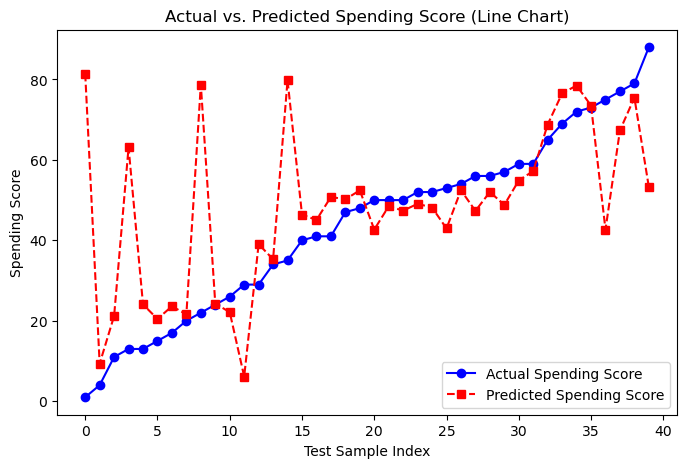

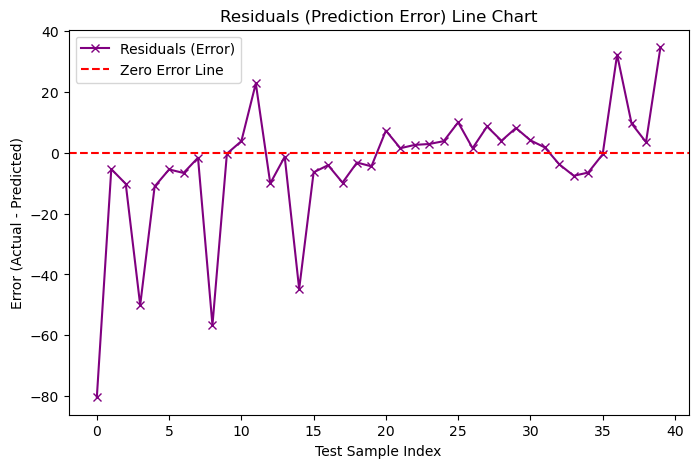

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")


# Load the dataset
file_path = "Mall_Customers.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Drop CustomerID as it's not relevant
df = df.drop(columns=["CustomerID"])

# Encode the categorical column 'Genre'
label_encoder = LabelEncoder()
df["Genre"] = label_encoder.fit_transform(df["Genre"])  # Male=1, Female=0

# Define features and target
X = df.drop(columns=["Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Convert y_test to NumPy array for sorting
y_test_array = y_test.to_numpy()

# Sort values for a smooth line plot
sorted_indices = np.argsort(y_test_array)
y_test_sorted = y_test_array[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# 1. Actual vs. Predicted Line Chart
plt.figure(figsize=(8, 5))
plt.plot(y_test_sorted, label="Actual Spending Score", marker="o", linestyle="-", color="blue")
plt.plot(y_pred_sorted, label="Predicted Spending Score", marker="s", linestyle="--", color="red")
plt.xlabel("Test Sample Index")
plt.ylabel("Spending Score")
plt.title("Actual vs. Predicted Spending Score (Line Chart)")
plt.legend()
plt.show()

# 2. Residual Line Chart
residuals_sorted = y_test_sorted - y_pred_sorted

plt.figure(figsize=(8, 5))
plt.plot(residuals_sorted, marker="x", linestyle="-", color="purple", label="Residuals (Error)")
plt.axhline(0, color='red', linestyle='dashed', label="Zero Error Line")
plt.xlabel("Test Sample Index")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Residuals (Prediction Error) Line Chart")
plt.legend()
plt.show()
